In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle("metro_plus_obesity_stats.pkl")
df.head()

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,n_housing,total,n_unmarried_households,n_male_male_couple,n_male_female_couple,n_female_female_couple,n_female_male_couple,n_other_household,percent_obese_fem,percent_obese_male
0,"Aberdeen, SD Micro Area",1520.0,904.0,391.0,53.0,536.0,739.0,1148.0,612.0,367.0,...,20075.0,17747.0,1053.0,56.0,440.0,4.0,553.0,16694.0,33.1,34.6
1,"Aberdeen, WA Micro Area",1952.0,1656.0,1133.0,36.0,505.0,761.0,1301.0,990.0,588.0,...,36273.0,28263.0,2715.0,8.0,1196.0,12.0,1499.0,25548.0,36.1,34.8
2,"Abilene, TX Metro Area",7241.0,3986.0,2673.0,1010.0,2434.0,2444.0,5633.0,2715.0,1260.0,...,71513.0,60394.0,3670.0,59.0,1562.0,84.0,1965.0,56724.0,27.2,26.1
3,"Ada, OK Micro Area",1368.0,847.0,455.0,122.0,509.0,639.0,1331.0,606.0,295.0,...,16881.0,14354.0,773.0,10.0,374.0,22.0,367.0,13581.0,30.7,31.4
4,"Adrian, MI Micro Area",3007.0,2219.0,1456.0,235.0,715.0,1175.0,2638.0,1465.0,805.0,...,43806.0,38222.0,2770.0,17.0,1384.0,47.0,1322.0,35452.0,37.5,36.6


In [2]:
[col for col in df.columns if "n_females_18_24" in col]

['n_females_18_24_middle_school_dropout',
 'n_females_18_24_high_school_dropout',
 'n_females_18_24_ged',
 'n_females_18_24_college_dropout',
 'n_females_18_24_associates',
 'n_females_18_24_bachelors',
 'n_females_18_24_grad',
 'n_females_18_24',
 'n_females_18_24_uni']

In [3]:
for col in df.columns:
    print(col)

area_name
n_unmarried_males_20_24
n_unmarried_males_25_29
n_unmarried_males_30_34
n_married_males_20_24
n_married_males_25_29
n_married_males_30_34
n_unmarried_females_20_24
n_unmarried_females_25_29
n_unmarried_females_30_34
n_married_females_20_24
n_married_females_25_29
n_married_females_30_34
n_males_18_24_middle_school_dropout
n_males_18_24_high_school_dropout
n_males_18_24_ged
n_males_18_24_college_dropout
n_males_18_24_associates
n_males_18_24_bachelors
n_males_18_24_grad
n_females_18_24_middle_school_dropout
n_females_18_24_high_school_dropout
n_females_18_24_ged
n_females_18_24_college_dropout
n_females_18_24_associates
n_females_18_24_bachelors
n_females_18_24_grad
n_households
n_white_households
n_black_households
n_amerindian_households
n_asian_households
n_islander_households
n_mixed_households
n_hispanic_households
median_income_males_living_alone
median_income_females_living_alone
p_male_disabled
p_female_disabled
p_white_disabled
p_black_disabled
p_amerindian_disabled
p

In [4]:
(df["percent_obese_fem"] == -1).mean()

0.0

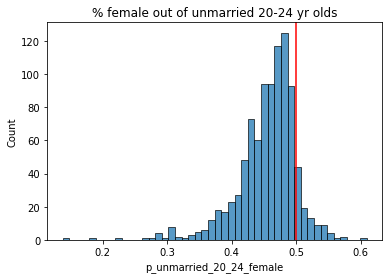

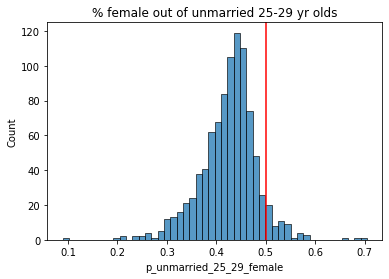

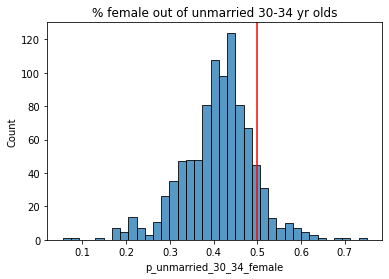

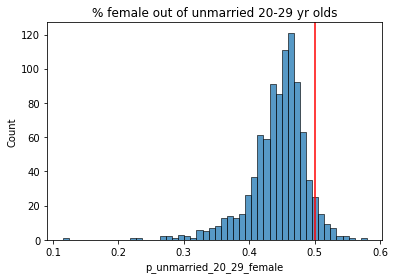

In [5]:
# is this because the data is biased, or because 23 yr old women get married to 25 year old men?
n_unmarried_20_24 = (df["n_unmarried_males_20_24"] + df["n_unmarried_females_20_24"])
df["p_unmarried_20_24_female"] = df["n_unmarried_females_20_24"] / n_unmarried_20_24

n_unmarried_25_29 = (df["n_unmarried_males_25_29"] + df["n_unmarried_females_25_29"])
df["p_unmarried_25_29_female"] = df["n_unmarried_females_25_29"] / n_unmarried_25_29

n_unmarried_30_34 = (df["n_unmarried_males_30_34"] + df["n_unmarried_females_30_34"])
df["p_unmarried_30_34_female"] = df["n_unmarried_females_30_34"] / n_unmarried_30_34

n_unmarried_20_29 = n_unmarried_20_24 + n_unmarried_25_29
df["p_unmarried_20_29_female"] = (df["n_unmarried_females_20_24"] + df["n_unmarried_females_25_29"]) / n_unmarried_20_29


sns.histplot(df["p_unmarried_20_24_female"])
plt.title("% female out of unmarried 20-24 yr olds")
plt.axvline(0.5, color="red")
plt.show()

sns.histplot(df["p_unmarried_25_29_female"])
plt.title("% female out of unmarried 25-29 yr olds")
plt.axvline(0.5, color="red")
plt.show()

sns.histplot(df["p_unmarried_30_34_female"])
plt.title("% female out of unmarried 30-34 yr olds")
plt.axvline(0.5, color="red")
plt.show()

sns.histplot(df["p_unmarried_20_29_female"])
plt.title("% female out of unmarried 20-29 yr olds")
plt.axvline(0.5, color="red")
plt.show()


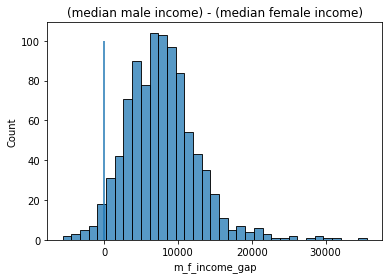

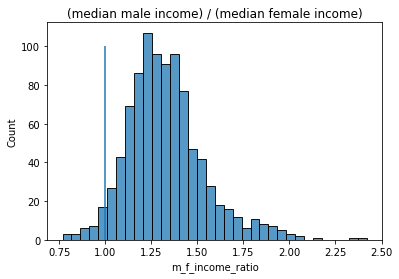

In [6]:
df["m_f_income_gap"] = df["median_income_males_living_alone"] - df["median_income_females_living_alone"]
sns.histplot(df["m_f_income_gap"])
plt.vlines(0, 0, 100)
plt.title("(median male income) - (median female income)")
plt.show()

df["m_f_income_ratio"] = df["median_income_males_living_alone"] / df["median_income_females_living_alone"]
sns.histplot(df["m_f_income_ratio"])
plt.vlines(1, 0, 100)
plt.title("(median male income) / (median female income)")
plt.show()

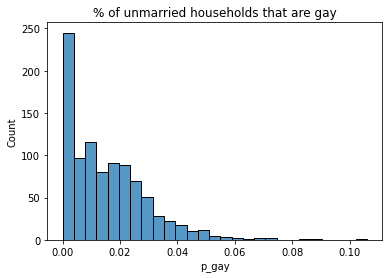

In [7]:
df["p_gay"] = df["n_male_male_couple"] / df["n_unmarried_households"]
sns.histplot(df["p_gay"])
plt.title("% of unmarried households that are gay")
plt.show()

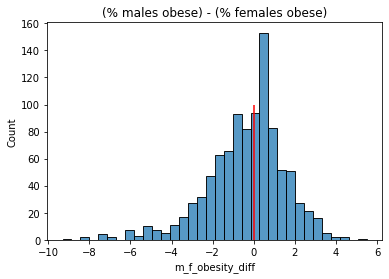

In [8]:
df["m_f_obesity_diff"] = df["percent_obese_male"] - df["percent_obese_fem"]

sns.histplot(df["m_f_obesity_diff"])
plt.title("(% males obese) - (% females obese)")
plt.vlines(0, 0, 100, color="red")
plt.show()

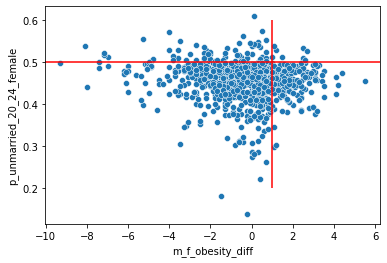

In [9]:
sns.scatterplot(x="m_f_obesity_diff", y="p_unmarried_20_24_female", data=df)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.vlines(1, 0.2, 0.6, color='r', linestyle='-')
plt.show()

In [10]:
df["p_hapa"] = df["n_hapa"] / df["n_people"]
df["p_white"] = df["n_white"] / df["n_people"]
df["p_black"] = df["n_black"] / df["n_people"]
df["p_asian"] = df["n_asian"] / df["n_people"]
df["p_cuban"] = df["n_cuban"] / df["n_people"]

<AxesSubplot:>

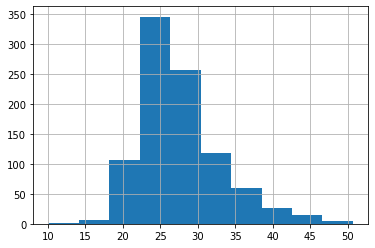

In [11]:
df["p_white_unmarried"].hist()

In [12]:
df["p_male_18_24_enrolled_in_uni"] = df["n_males_18_24_uni"] / df["n_males_18_24"]
df["p_female_18_24_enrolled_in_uni"] = df["n_females_18_24_uni"] / df["n_females_18_24"]

df["p_male_18_24_has_grad_degree"] = df["n_males_18_24_grad"] / df["n_males_18_24"]
df["p_female_18_24_has_grad_degree"] = df["n_females_18_24_grad"] / df["n_females_18_24"]

df.loc[df.n_people > 150000].sort_values("p_female_18_24_has_grad_degree", ascending=False).head(20)

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,m_f_obesity_diff,p_hapa,p_white,p_black,p_asian,p_cuban,p_male_18_24_enrolled_in_uni,p_female_18_24_enrolled_in_uni,p_male_18_24_has_grad_degree,p_female_18_24_has_grad_degree
758,"San Jose-Sunnyvale-Santa Clara, CA Metro Area",62681.0,65971.0,37677.0,1365.0,14682.0,39322.0,53883.0,44501.0,23523.0,...,-1.4,0.022834,0.455939,0.024390,0.354497,0.001374,0.547582,0.567801,0.028977,0.030909
10,"Albany-Schenectady-Troy, NY Metro Area",33455.0,22940.0,14661.0,566.0,5374.0,11143.0,31677.0,18088.0,12177.0,...,2.2,0.005419,0.826537,0.077641,0.043918,0.001917,0.490079,0.574761,0.012201,0.029316
124,"Buffalo-Cheektowaga, NY Metro Area",35837.0,32692.0,18802.0,787.0,7453.0,15479.0,34357.0,28186.0,15838.0,...,-1.6,0.003836,0.795690,0.122590,0.031084,0.001142,0.468412,0.516557,0.008211,0.027280
154,"Champaign-Urbana, IL Metro Area",17614.0,6497.0,3230.0,516.0,2072.0,3642.0,15310.0,5539.0,2331.0,...,-2.1,0.008475,0.736708,0.125369,0.100153,0.001507,0.725618,0.756082,0.027442,0.026922
31,"Ann Arbor, MI Metro Area",23972.0,11737.0,5609.0,385.0,2759.0,5372.0,22420.0,9495.0,4176.0,...,-1.1,0.012259,0.735689,0.119332,0.091215,0.002177,0.697929,0.742902,0.018987,0.026015
509,"Madison, WI Metro Area",30543.0,19437.0,10359.0,812.0,5777.0,12256.0,28493.0,15161.0,7480.0,...,-3.3,0.007544,0.860128,0.044338,0.049943,0.001458,0.531401,0.604105,0.015755,0.025995
104,"Boston-Cambridge-Newton, MA-NH Metro Area",166502.0,152604.0,87730.0,2873.0,27701.0,74246.0,163707.0,135732.0,72770.0,...,1.0,0.008015,0.760209,0.083332,0.079401,0.002466,0.494483,0.574953,0.014996,0.025192
651,"Panama City, FL Metro Area",5381.0,4250.0,2788.0,493.0,2084.0,3080.0,3836.0,3133.0,1838.0,...,3.5,0.007137,0.810585,0.110106,0.023435,0.006774,0.240439,0.309916,0.000000,0.025048
607,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",585877.0,582929.0,366543.0,14529.0,101879.0,262950.0,568225.0,525463.0,312391.0,...,-1.0,0.006840,0.575429,0.173251,0.112302,0.007574,0.446902,0.514185,0.012694,0.022418
566,"Montgomery, AL Metro Area",11387.0,8928.0,5745.0,731.0,3527.0,5012.0,11372.0,8867.0,5268.0,...,-7.4,0.003807,0.501662,0.446847,0.019797,0.000549,0.302096,0.409241,0.008259,0.022333


In [17]:
# Use Bayes' Rule (with a few independence assumptions) to estimate 
# P(female | not fat, unmarried, not in college, 20-24)

# P(female, eligible) = P(female, not fat, unmarried, not in college, 20-24)
p_not_fat_given_girl = 1 - 0.01 * df["percent_obese_fem"]
p_unmarried_given_girl_age = df["n_unmarried_females_20_24"] / (df["n_married_females_20_24"] + 
                                                                df["n_unmarried_females_20_24"])

p_girl_given_not_enrolled_age = df["n_females_18_24_uni"] / (df["n_females_18_24_uni"] + 
                                                             df["n_males_18_24_uni"])

p_not_enrolled_age = (df["n_females_18_24_uni"] + df["n_males_18_24_uni"]) / df["n_people"]

p_female_eligible = (p_not_fat_given_girl * 
                       p_unmarried_given_girl_age * 
                       p_girl_given_not_enrolled_age)

# P(male, eligible)
p_not_fat_given_male = 1 - 0.01 * df["percent_obese_male"]
p_unmarried_given_male_age = df["n_unmarried_males_20_24"] / (df["n_married_males_20_24"] + 
                                                              df["n_unmarried_males_20_24"])

p_male_given_not_enrolled_age = df["n_males_18_24_uni"] / (df["n_males_18_24_uni"] + 
                                                           df["n_females_18_24_uni"])

p_not_enrolled_age = (df["n_males_18_24_uni"] + df["n_females_18_24_uni"]) / df["n_people"]

p_male_eligible = (p_not_fat_given_male *
                     p_unmarried_given_male_age * 
                     p_male_given_not_enrolled_age)

# don't need p_not_enrolled_age. I have to assume it's independent of gender, so it cancels
# also can't make use of race here for that same reason. 
p_female_given_eligible = p_female_eligible / (p_female_eligible + p_male_eligible)

df["p_female_given_thin_unmarried_20_24_not_enrolled"] = p_female_given_eligible
df["p_female_thin_unmarried_20_24_not_enrolled"] = p_female_eligible

In [14]:
df["p_black_given_unmarried"] = df["p_black_unmarried"] * df["p_black"] / (df["p_unmarried"])
df["p_asian_given_unmarried"] = df["p_asian_unmarried"] * df["p_asian"] / df["p_unmarried"]
df["p_white_given_unmarried"] = df["p_white_unmarried"] * df["p_white"] / df["p_unmarried"]
df["p_not_enrolled_given_20_24"] = 1 - (df["n_20_24_school"] / df["n_20_24"])

In [15]:
df.query("n_people > 200000").sort_values("p_female_given_thin_unmarried_20_24_not_enrolled", ascending=False).head(10)

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_cuban,p_male_18_24_enrolled_in_uni,p_female_18_24_enrolled_in_uni,p_male_18_24_has_grad_degree,p_female_18_24_has_grad_degree,p_female_given_thin_unmarried_20_24_not_enrolled,p_black_given_unmarried,p_asian_given_unmarried,p_white_given_unmarried,p_not_enrolled_given_20_24
216,"Daphne-Fairhope-Foley, AL Metro Area",4927.0,4048.0,2398.0,360.0,1494.0,2685.0,4740.0,2714.0,1112.0,...,0.001847,0.195272,0.361735,0.002441,0.008832,0.655536,0.178167,0.007941,0.767822,0.751425
720,"Rochester, MN Metro Area",5357.0,4286.0,2926.0,515.0,2297.0,4135.0,5334.0,3519.0,1910.0,...,0.001321,0.244199,0.396096,0.003645,0.015519,0.621030,0.082079,0.048073,0.813845,0.668900
793,"Shreveport-Bossier City, LA Metro Area",11266.0,9800.0,6118.0,1355.0,3621.0,6059.0,10272.0,8826.0,5943.0,...,0.000701,0.184667,0.358605,0.002864,0.004761,0.612851,0.570743,0.010367,0.394428,0.710986
168,"Clarksville, TN-KY Metro Area",10936.0,7056.0,2711.0,4201.0,7220.0,7170.0,7085.0,5243.0,2158.0,...,0.002347,0.169401,0.384055,0.005338,0.004230,0.611297,0.283652,0.013139,0.618905,0.754217
805,"Spartanburg, SC Metro Area",8900.0,7333.0,3851.0,716.0,2854.0,4459.0,8686.0,6280.0,3008.0,...,0.001196,0.295805,0.467558,0.002556,0.005841,0.608564,0.325261,0.024226,0.598256,0.635157
506,"Macon-Bibb County, GA Metro Area",6939.0,5228.0,3489.0,348.0,1874.0,2151.0,6935.0,5145.0,3112.0,...,0.001586,0.292213,0.470535,0.013010,0.014642,0.598217,0.612596,0.012236,0.352907,0.618815
275,"Evansville, IN-KY Metro Area",8667.0,7097.0,3694.0,918.0,3080.0,4918.0,8435.0,5597.0,2654.0,...,0.000854,0.325517,0.475550,0.003151,0.012386,0.596113,0.122446,0.011152,0.812302,0.619389
767,"Savannah, GA Metro Area",13314.0,10346.0,6513.0,728.0,3941.0,5971.0,12411.0,9644.0,5175.0,...,0.003927,0.355901,0.540219,0.004285,0.008449,0.593286,0.460366,0.021491,0.465907,0.572978
618,"Ocala, FL Metro Area",8053.0,7034.0,4468.0,471.0,2028.0,3340.0,7188.0,6026.0,3529.0,...,0.010964,0.200520,0.316343,0.007315,0.006243,0.589038,0.234050,0.012683,0.718644,0.725807
685,"Portland-South Portland, ME Metro Area",14829.0,12594.0,6808.0,566.0,3201.0,8438.0,13774.0,10635.0,5603.0,...,0.001434,0.332233,0.493480,0.006738,0.012005,0.586720,0.033967,0.017591,0.911963,0.595260


In [18]:
df.to_csv("final_metric_stats.csv", index=False)